In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from pylab import rcParams
# some display options to make figures bigger
pd.set_option('display.max_columns', 25)
rcParams['figure.figsize'] = (17, 7)

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

PROJECT_DIR = os.path.dirname(dotenv_path)
BASE_URL = os.environ.get("BASE_URL")
EXTERNAL_DATA_DIR = PROJECT_DIR + os.environ.get("EXTERNAL_DATA_DIR")
RAW_DATA_DIR = PROJECT_DIR + os.environ.get("RAW_DATA_DIR")
INTERIM_DATA_DIR = PROJECT_DIR + os.environ.get("INTERIM_DATA_DIR")
PROCESSED_DATA_DIR = PROJECT_DIR + os.environ.get("PROCESSED_DATA_DIR")
files=os.environ.get("FILES").split()

In [3]:
househld=pd.read_csv(RAW_DATA_DIR+'/househld.csv')
family=pd.read_csv(RAW_DATA_DIR+'/familyxx.csv')
persons=pd.read_csv(RAW_DATA_DIR+'/personsx.csv')
samadult=pd.read_csv(RAW_DATA_DIR+'/samadult.csv')

In [4]:
househld

,INTV_QRT,INTV_MON,LIVQRT,ACPTCHLD,REJ_PER,REJ_FAM,ACPT_PER,ACPT_FAM,NON_INTV,RECTYPE,SRVY_YR,HHX,REGION,WTIA_HH,WTFA_HH,STRAT_P,PSU_P
0,1,3,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,1,2,3052.5,0,108,2
1,1,3,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,2,1,2497.5,0,47,2
2,1,3,1,NaN,NaN,NaN,NaN,NaN,2.0,10,2015,3,1,1086.7,0,19,2
3,1,1,1,0.0,0.0,0.0,1.0,1.0,NaN,10,2015,4,3,3330.0,3330,163,2
4,1,3,1,2.0,0.0,0.0,4.0,1.0,NaN,10,2015,5,4,138.7,185,289,2
5,1,2,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,6,1,668.8,0,45,1
6,1,1,1,NaN,NaN,NaN,NaN,NaN,5.0,10,2015,10,1,3330.0,0,31,2
7,1,2,1,0.0,0.0,0.0,1.0,1.0,NaN,10,2015,11,4,2200.0,4400,274,2
8,1,1,1,0.0,0.0,0.0,2.0,1.0,NaN,10,2015,13,3,3330.0,4171,199,2
9,1,2,1,NaN,NaN,NaN,NaN,NaN,2.0,10,2015,14,2,436.3,0,114,1


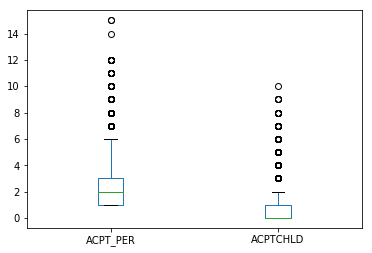

In [23]:
househld[['ACPT_PER','ACPTCHLD', ]].plot(kind='box')

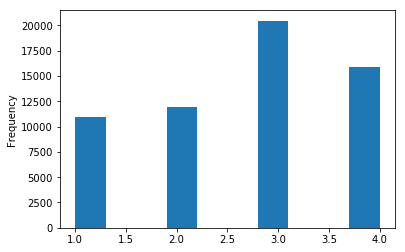

In [24]:
househld['REGION'].plot(kind='hist')

In [5]:
non_response_code=househld['NON_INTV']

In [18]:
type(non_response_code)

pandas.core.series.Series

In [7]:
import math

responded=[math.isnan(x) for x in non_response_code]
non=[not math.isnan(x) for x in non_response_code]


responses=househld[responded]
nonresp=househld[non]



In [8]:
non_intv_group=nonresp.groupby('NON_INTV')

In [19]:
non_intv_group.describe()

ACPTCHLD  ACPT_FAM  ACPT_PER           HHX      INTV_MON  \
NON_INTV                                                                   
1.0      count       0.0       0.0       0.0  12061.000000  12061.000000   
         mean        NaN       NaN       NaN  43694.144515      6.550701   
         std         NaN       NaN       NaN  24941.369405      3.459602   
         min         NaN       NaN       NaN      1.000000      1.000000   
         25%         NaN       NaN       NaN  22004.000000      4.000000   
         50%         NaN       NaN       NaN  44004.000000      7.000000   
         75%         NaN       NaN       NaN  65731.000000     10.000000   
         max         NaN       NaN       NaN  85445.000000     12.000000   
2.0      count       0.0       0.0       0.0   3309.000000   3309.000000   
         mean        NaN       NaN       NaN  45060.282563      6.756724   
         std         NaN       NaN       NaN  25335.629376      3.495426   
         min         NaN       NaN       NaN      3.000000      1.000000   
         25%         NaN       NaN       NaN  22273.000000      4.000000   
         50%         NaN       NaN       NaN  47420.000000      7.000000   
         75%         NaN       NaN       NaN  67650.000000     10.000000   
         max         NaN       NaN       NaN  85448.000000     12.000000   
3.0      count       0.0       0.0       0.0    323.000000    323.000000   
         mean        NaN       NaN       NaN  44689.108359      6.739938   
         std         NaN       NaN       NaN  25362.404191      3.528128   
         min         NaN       NaN       NaN    303.000000      1.000000   
         25%         NaN       NaN       NaN  21417.500000      3.000000   
         50%         NaN       NaN       NaN  45223.000000      7.000000   
         75%         NaN       NaN       NaN  67838.000000     10.000000   
         max         NaN       NaN       NaN  85186.000000     12.000000   
4.0      count       0.0       0.0       0.0    142.000000    142.000000   
         mean        NaN       NaN       NaN  47075.457746      7.063380   
         std         NaN       NaN       NaN  20070.234867      2.878669   
         min         NaN       NaN       NaN   1458.000000      1.000000   
         25%         NaN       NaN       NaN  32127.000000      5.000000   
         50%         NaN       NaN       NaN  47521.000000      7.000000   
         75%         NaN       NaN       NaN  61779.250000      9.000000   
         max         NaN       NaN       NaN  83897.000000     12.000000   
5.0      count       0.0       0.0       0.0   1842.000000   1842.000000   
         mean        NaN       NaN       NaN  43975.017915      6.566232   
         std         NaN       NaN       NaN  24451.021318      3.377114   
         min         NaN       NaN       NaN     10.000000      1.000000   
         25%         NaN       NaN       NaN  21867.500000      4.000000   
         50%         NaN       NaN       NaN  46533.500000      7.000000   
         75%         NaN       NaN       NaN  63926.500000      9.000000   
         max         NaN       NaN       NaN  85431.000000     12.000000   

                    INTV_QRT        LIVQRT         PSU_P  RECTYPE  \
NON_INTV                                                            
1.0      count  12061.000000  12061.000000  12061.000000  12061.0   
         mean       2.513888      2.378078      1.486693     10.0   
         std        1.125202     10.706703      0.499844      0.0   
         min        1.000000      1.000000      1.000000     10.0   
         25%        2.000000      1.000000      1.000000     10.0   
         50%        3.000000      1.000000      1.000000     10.0   
         75%        4.000000      1.000000      2.000000     10.0   
         max        4.000000     98.000000      2.000000     10.0   
2.0      count   3309.000000   3309.000000   3309.000000   3309.0   
         mean       2.583862      1.556966      1.470837     10.

In [20]:
non_intv_group.size()

NON_INTV
1.0    12061
2.0     3309
3.0      323
4.0      142
5.0     1842
dtype: int64

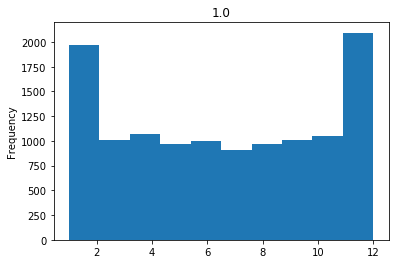

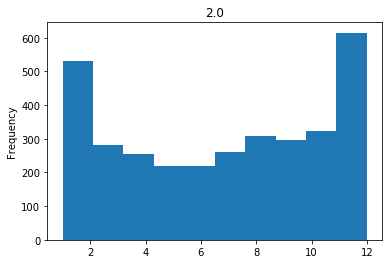

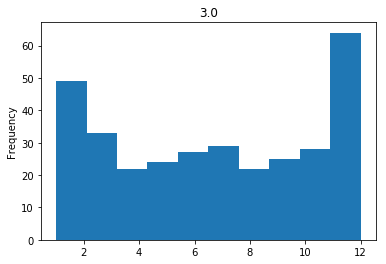

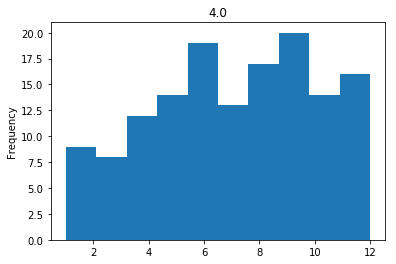

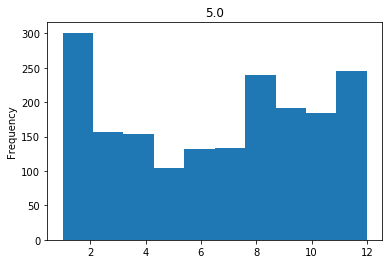

In [41]:
for name, group in non_intv_group:
    #print(name)
    group['INTV_MON'].plot(kind='hist',title=name)
    plt.show()
    
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e503c8358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e5021b358>]], dtype=object)

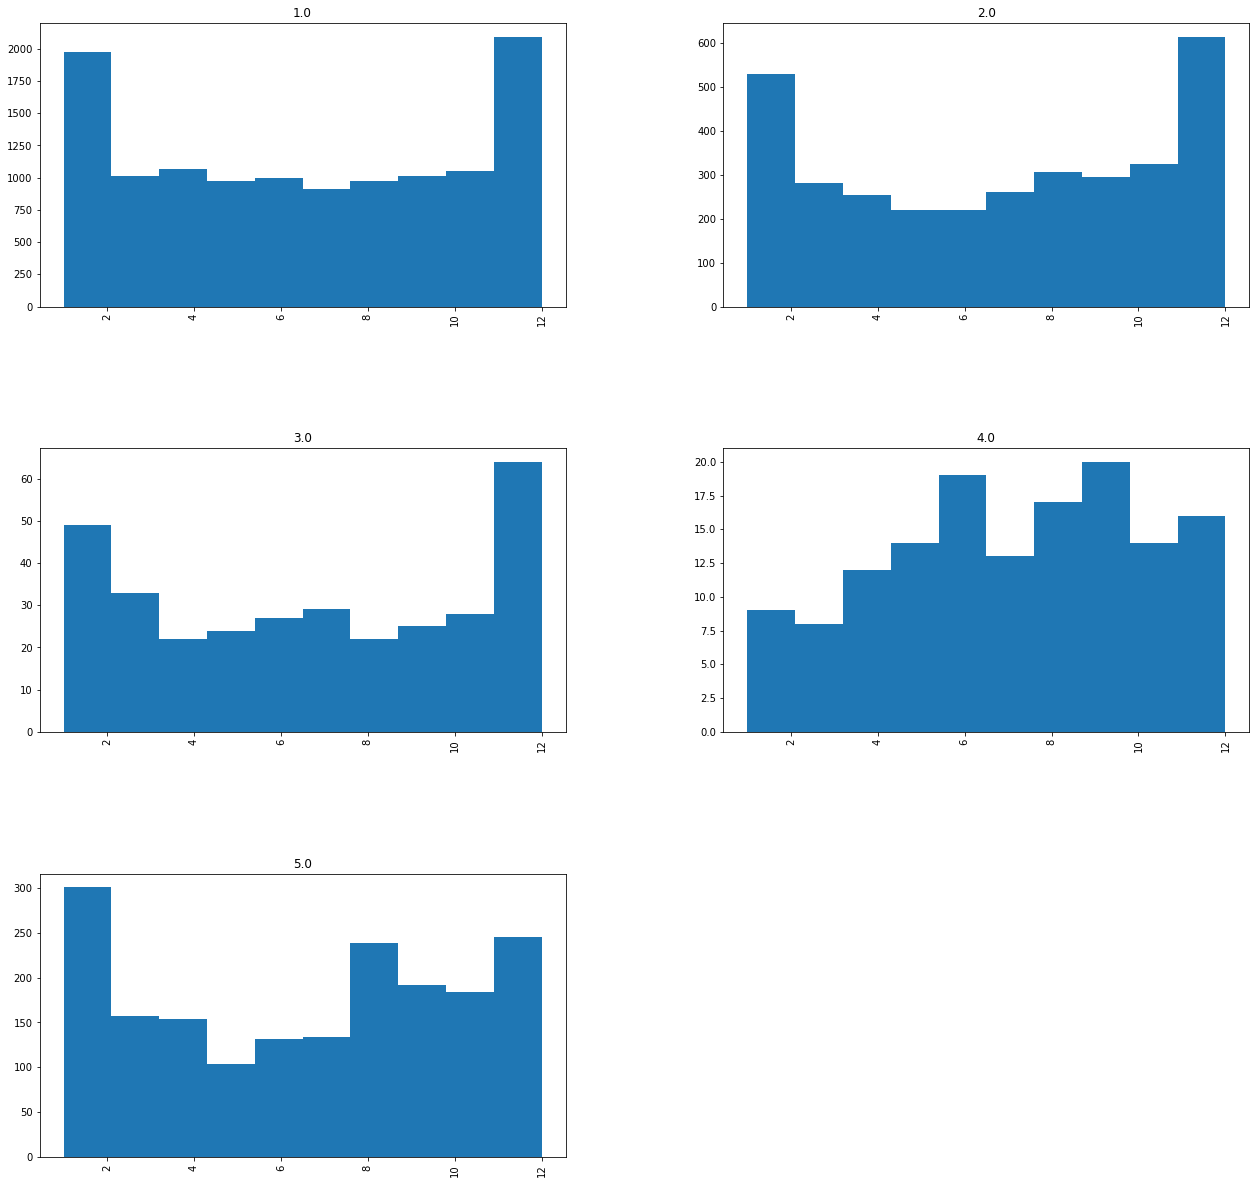

In [51]:
rcParams['figure.figsize'] = (21, 21)
househld['INTV_MON'].hist(by=househld['NON_INTV'])

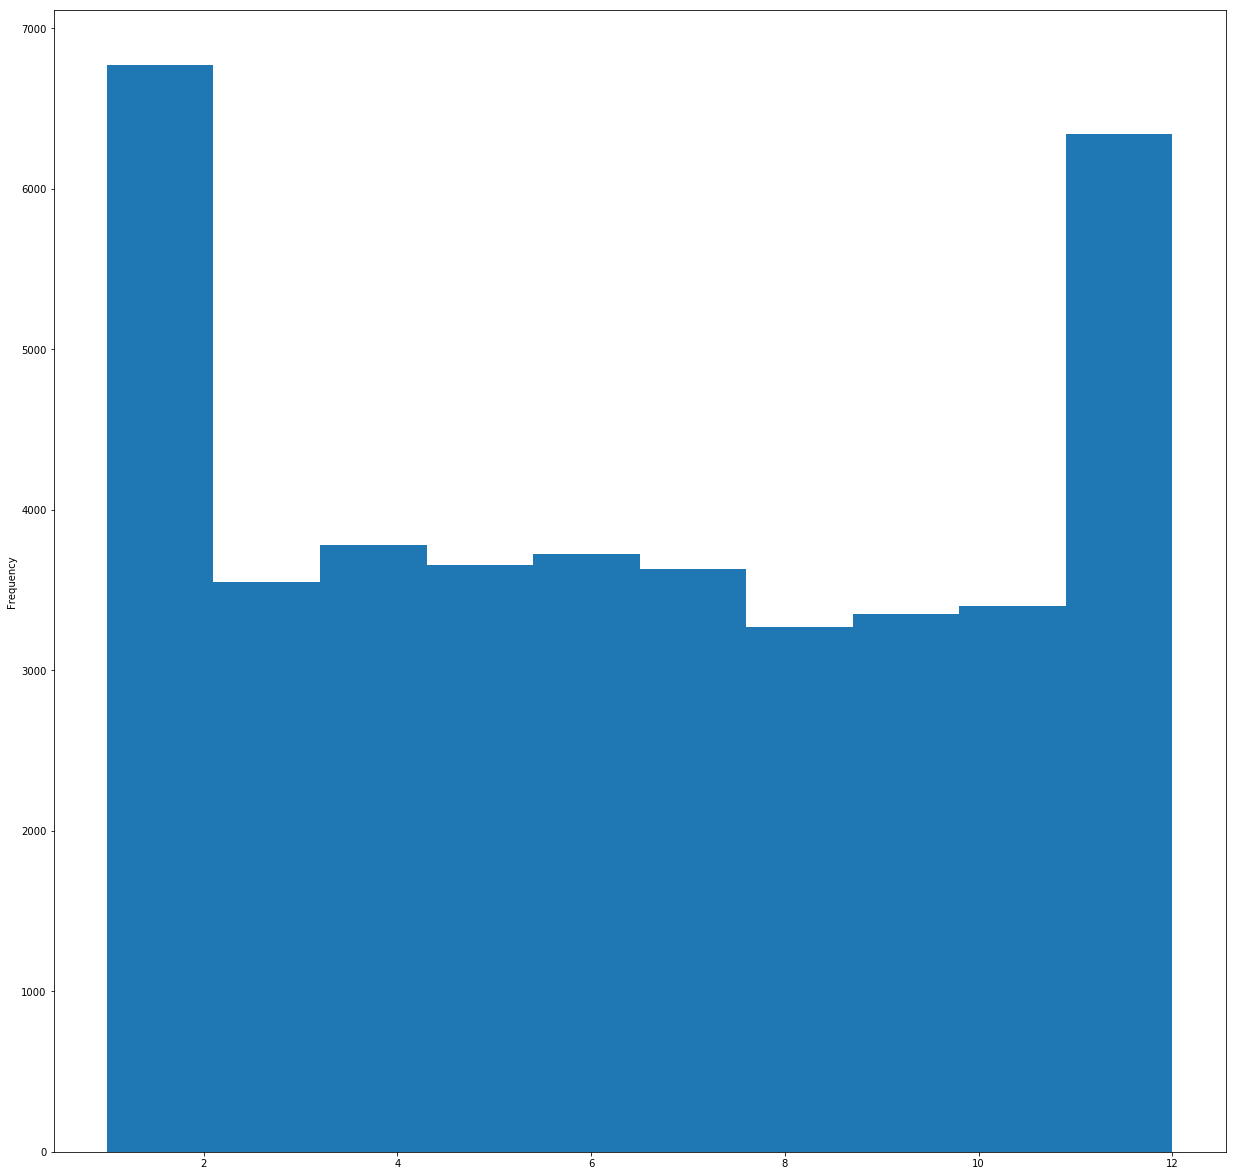

In [52]:
responses['INTV_MON'].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e79a3a4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e7c240358>]], dtype=object)

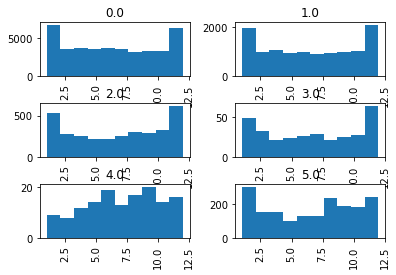

In [46]:
househld['INTV_MON'].hist(by=househld['NON_INTV'].fillna(0))